## Data Cleaning

In [1]:
%matplotlib inline
from patsy import dmatrices
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
from sklearn.cluster import KMeans,DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matches_cleaned.csv')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df

,Unnamed: 0,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...
5,5,NALCS,2015,Spring,Season,DIG,0,1,TIP,24,...,Lulu,"[475, 475, 532, 821, 1152, 1493, 1719, 2123, 2...",Apollo,Corki,"[475, 475, 532, 826, 1107, 1422, 1760, 2081, 2...",Adrian,Thresh,"[515, 515, 577, 749, 926, 1081, 1235, 1360, 15...","['Azir', 'RekSai', 'Lissandra']",http://matchhistory.na.leagueoflegends.com/en/...
6,6,NALCS,2015,Spring,Season,CST,1,0,WFX,39,...,Leblanc,"[475, 475, 553, 856, 1157, 1433, 1670, 1990, 2...",Altec,Tristana,"[475, 475, 533, 771, 1102, 1444, 2126, 2450, 2...",Gleeb,Nami,"[515, 520, 589, 764, 937, 1089, 1367, 1509, 16...","['RekSai', 'Gnar', 'Kassadin']",http://matchhistory.na.leagueoflegends.com/en/...
7,7,NALCS,2015,Spring,Season,TL,1,0,CLG,43,...,Leblanc,"[475, 475, 532, 821, 1168, 1393, 1594, 1871, 2...",Doublelift,Sivir,"[475, 475, 532, 761, 1107, 1478, 1746, 2126, 2...",Aphromoo,Blitzcrank,"[515, 515, 577, 718, 871, 995, 1149, 1320, 149...","['Nunu', 'Gnar', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
8,8,NALCS,2015,Spring,Season,C9,0,1,GV,41,...,Zed,"[475, 475, 532, 786, 1052, 1297, 1539, 1898, 2...",Cop,Corki,"[475, 475, 532, 746, 1243, 1610, 1867, 2175, 2...",Bunny FuFuu,Morgana,"[515, 525, 593, 749, 1349, 1504, 1664, 1886, 2...","['Rumble', 'Lissandra', 'Fizz']",http://matchhistory.na.leagueoflegends.com/en/...
9,9,NALCS,2015,Spring,Season,T8,1,0,TSM,32,...,Leblanc,"[475, 475, 532, 856, 1157, 1432, 1700, 2086, 2...",WildTurtle,Graves,"[475, 475, 532, 796, 1147, 1432, 1684, 1972, 2...",Lustboy,Morgana,"[515, 515, 583, 722, 865, 1002, 1201, 1375, 15...","['RekSai', 'JarvanIV', 'Lissandra']",http://matchhistory.na.leagueoflegends.com/en/...


In [3]:
goldDiff = df[['golddiff']]

In [4]:
average=[]
for row in df["golddiff"]:
    row=row.replace("[","")
    row=row.replace("]","")
    result=row.split(",")
    count=0
    total=0
    for eachItem in result:
        eachItem=int(eachItem)
        count = count + 1
        total = total + eachItem
    average.append(total/count)
df['averageDiff'] = average

In [5]:
df.head()

,Unnamed: 0,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,...,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address,averageDiff
0,0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...,1360.925000
1,1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,...,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...,968.657895
2,2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,...,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...,4937.075000
3,3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,...,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...,-736.365854
4,4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,...,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...,1589.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 59 columns):
Unnamed: 0          7053 non-null int64
League              7053 non-null object
Year                7053 non-null int64
Season              7053 non-null object
Type                7053 non-null object
blueTeamTag         7053 non-null object
bResult             7053 non-null int64
rResult             7053 non-null int64
redTeamTag          7053 non-null object
gamelength          7053 non-null int64
golddiff            7053 non-null object
goldblue            7053 non-null object
bKills              7053 non-null object
bTowers             7053 non-null object
bInhibs             7053 non-null object
bDragons            7053 non-null object
bBarons             7053 non-null object
bHeralds            7053 non-null object
goldred             7053 non-null object
rKills              7053 non-null object
rTowers             7053 non-null object
rInhibs             7053 non-null obj

In [7]:
from sklearn.cluster import KMeans #导入K均值聚类算法
k = 5
iteration = 500   

In [8]:
# dataSet = df.as_matrix(columns=None)
data = df[['Year','bResult','rResult','gamelength','averageDiff']]

In [9]:
data

,Year,bResult,rResult,gamelength,averageDiff
0,2015,1,0,40,1360.925000
1,2015,0,1,38,968.657895
2,2015,1,0,40,4937.075000
3,2015,0,1,41,-736.365854
4,2015,1,0,35,1589.000000
5,2015,0,1,24,-1477.625000
6,2015,1,0,39,4602.487179
7,2015,1,0,43,2879.627907
8,2015,0,1,41,-668.878049
9,2015,1,0,32,1297.156250


In [10]:
data.describe()

,Year,bResult,rResult,gamelength,averageDiff
count,7053.000000,7053.000000,7053.000000,7053.000000,7053.000000
mean,2016.236779,0.544733,0.455267,36.937615,269.324319
std,0.796207,0.498030,0.498030,7.923347,3240.178965
min,2014.000000,0.000000,0.000000,17.000000,-8659.372093
25%,2016.000000,0.000000,0.000000,31.000000,-2501.500000
50%,2016.000000,1.000000,0.000000,36.000000,516.756098
75%,2017.000000,1.000000,1.000000,41.000000,2975.629630
max,2017.000000,1.000000,1.000000,81.000000,8706.260870


## Clustering

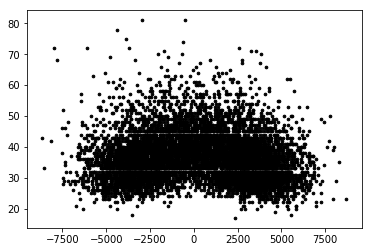

In [11]:
plt.scatter(data['averageDiff'],data['gamelength'], c='black', s=7)

In [12]:
X=np.array(list(zip(data['averageDiff'],data['gamelength'])))

In [13]:
kmeans = KMeans()
kmeans.fit(X)
labels = kmeans.predict(X)

Text(0,0.5,'averageDiff')

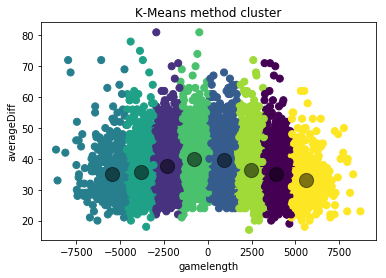

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("K-Means method cluster")
plt.xlabel("gamelength")
plt.ylabel("averageDiff")

#### Use the K-Means method, we could find there are 8 clusters in the data

In [15]:
stscaler = StandardScaler().fit(X)# scale process!!!
X_2= stscaler.transform(X)

In [16]:
X_2

array([[ 0.33691907,  0.3865288 ],
       [ 0.21584708,  0.13409233],
       [ 1.44068635,  0.3865288 ],
       ..., 
       [-1.67605227,  0.76518351],
       [ 1.56004779, -1.50674471],
       [ 1.27779469, -0.24456237]])

In [17]:
kmeans = KMeans()
kmeans.fit(X_2)
labels = kmeans.predict(X_2)

Text(0,0.5,'averageDiff')

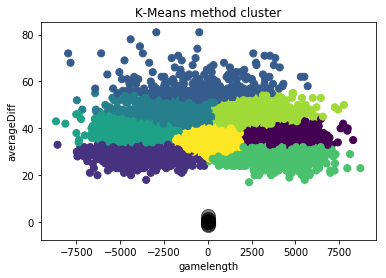

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title("K-Means method cluster")
plt.xlabel("gamelength")
plt.ylabel("averageDiff")

* Does scaling effect the clustering?
Yes, we can see the diffence between two imgs above.

In [19]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(X_2)

In [20]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

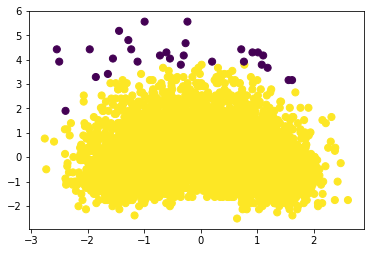

In [21]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=labels, s=50, cmap='viridis')

Use the DBSCAN method, we could find there are 2 clusters in the data which is different from the result of K-Mean Alogrithm.

However, via analyzing these two graphs, we can find that gold diff is positivelt related to game length. No intersting group is found. Therefore, we need further analysis about this dataset.

The scaling is important. It in average improve the results, and it probably will not worsen them. The reason is that normalization gives the same importance to all the variables.

* Do the clustering methods generate the same clusters?
No

* Does the clustering produce interesting groupings?
No

# Linear Model

First Pridictor

In [22]:
df_grouped = df.groupby('gamelength').mean()
df_grouped = df_grouped.reset_index()

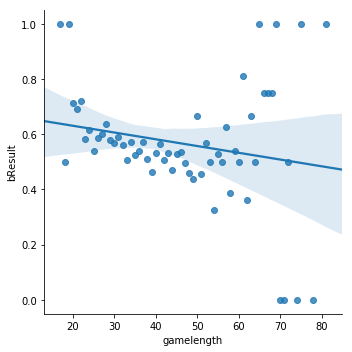

In [23]:
sns.lmplot(y ='bResult', x = 'gamelength', data = df_grouped)
plt.show()

In [24]:
x = df_grouped[['gamelength']]
y = df_grouped[['bResult']]
model = linear_model.LinearRegression()
results = model.fit(x, y)
print (results.intercept_, results.coef_)

[ 0.67955485] [[-0.00244492]]


In [25]:
results

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
model2 = sm.OLS(y, x)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bResult   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     149.5
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           8.17e-18
Time:                        18:27:07   Log-Likelihood:                -17.299
No. Observations:                  60   AIC:                             36.60
Df Residuals:                      59   BIC:                             38.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
gamelength     0.0103      0.001     12.226      0.000       0.009       0.012
==============================================================================
Omnibus:                       11.911   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.726
Skew:                          -0.780   Prob(JB):                     0.000634
Kurtosis:                       4.859   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above we can see that the R-squared value is close to 1, so I think the linear regression is significant.

To see if the violation is violated, I assume that the relationship of the model is y = -0.00244492x + 0.67955485. With this function we can predict that the number of <1 year (all cause deaths) is 1.2240, so the P value is 1.2240/1.600611 = 76.43% >> 5%. Thus, the assumption is not violated.

In [27]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .55, random_state=0)

In [28]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(x_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0,0.5,'$\\hat{y}_i$')

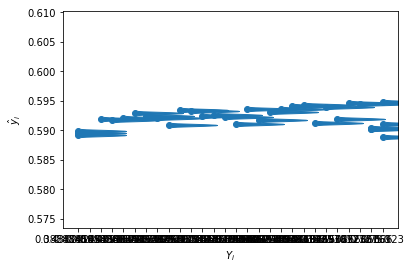

In [29]:
y_pred = ridge.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("$Y_i$")
plt.ylabel("$\hat{y}_i$")

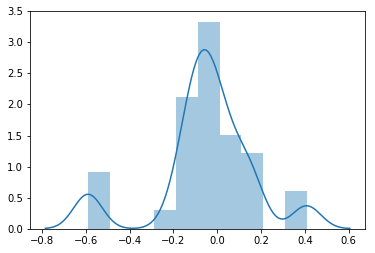

In [30]:
sns.distplot(y_test - y_pred)

In [31]:
accuracy = metrics.r2_score(y_test, y_pred)
accuracy

-0.04382352896463626

In [32]:
scores = cross_val_score(results, y_pred, y_test, cv = 5)
scores

array([-0.87554934,  0.13303484, -2.34996358, -0.67715623, -0.89202248])

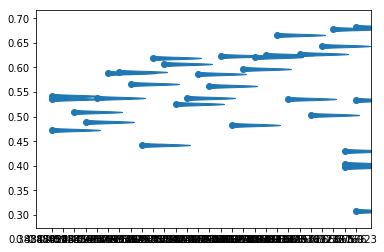

In [33]:
predictions = cross_val_predict(results, y_pred, y_test, cv = 5)
plt.scatter(y_test, predictions)

In [34]:
accuracy = metrics.r2_score(y_test, predictions)
accuracy

-0.17825292387017244

In [35]:
The previous accuracy is -0.04382352896463626, after regularization, the accuracy is -0.17825292387016245. So we can see that regularization helps to make the prediction more accurate

We will show multi-colinearity in the model later!

SyntaxError: invalid syntax (<ipython-input-35-ee8a25d16095>, line 1)

Second Predictor

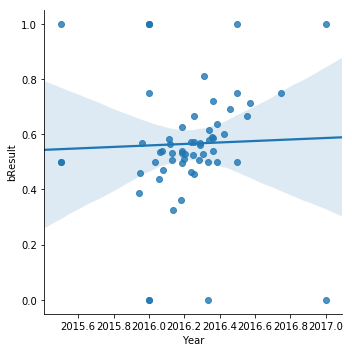

In [36]:
sns.lmplot(y = 'bResult', x = 'Year', data = df_grouped)
plt.show()

In [37]:
x2 = df_grouped[['Year']]
y2 = df_grouped[['bResult']]
model = linear_model.LinearRegression()
results2 = model.fit(x2, y2)
print (results2.intercept_, results2.coef_)

[-53.73325689] [[ 0.0269309]]


In [38]:
model = sm.OLS(y2, x2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                bResult   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     388.8
Date:                Tue, 27 Feb 2018   Prob (F-statistic):           1.19e-27
Time:                        18:27:16   Log-Likelihood:                 5.6378
No. Observations:                  60   AIC:                            -9.276
Df Residuals:                      59   BIC:                            -7.181
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0003   1.42e-05     19.718      0.000       0.000       0.000
==============================================================================
Omnibus:                        6.036   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                6.993
Skew:                          -0.347   Prob(JB):                       0.0303
Kurtosis:                       4.522   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the table above we can see that the R-squared value is very close to 1, so I think the linear regression is significant.

In [39]:
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size= .3, random_state=0)
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor

Text(0,0.5,'$\\hat{y}_i$')

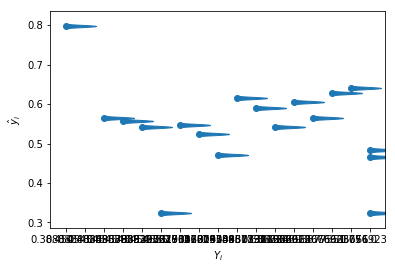

In [40]:
linreg = LinearRegression()
linreg.fit(x_train2, y_train2)

y_pred2 = linreg.predict(x_test2)

plt.scatter(y_test2, y_pred2)
plt.xlabel("$Y_i$")
plt.ylabel("$\hat{y}_i$")

In [41]:
accuracy2 = metrics.r2_score(y_test2, y_pred2)
accuracy2

-0.76885499192770235

In [42]:
model4 = linear_model.LinearRegression().fit(x_train, y_train)
scores = cross_val_score(model4, y_pred2, y_test2, cv = 6)
scores

array([ 0.42791993, -0.3963972 , -0.60085686, -1.49662685, -1.79055253,
       -8.86852161])

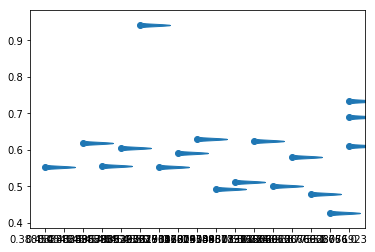

In [43]:
predictions2 = cross_val_predict(model4, y_pred2, y_test2, cv = 6)
plt.scatter(y_test2, predictions2)

In [44]:
accuracy = metrics.r2_score(y_test2, predictions2)
accuracy

-0.28611384776169491

The result shows that the regularization in this predictor is unhelpful.

From the accuracy calculated above, I think the first predictor is the more significant than the second one!

In [45]:
df.corr()

,Unnamed: 0,Year,bResult,rResult,gamelength,averageDiff
Unnamed: 0,1.000000,0.187304,0.000657,-0.000657,-0.063651,-0.003595
Year,0.187304,1.000000,0.009046,-0.009046,-0.092762,0.021252
bResult,0.000657,0.009046,1.000000,-1.000000,-0.051040,0.763982
rResult,-0.000657,-0.009046,-1.000000,1.000000,0.051040,-0.763982
gamelength,-0.063651,-0.092762,-0.051040,0.051040,1.000000,-0.074023
averageDiff,-0.003595,0.021252,0.763982,-0.763982,-0.074023,1.000000


* Is the relationship significant? No
* Are any model assumptions violated? No
* Is there any multi-colinearity in the model? No
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model. I think it should be gamelength.
* Does the model make sense? Yes
* Cross-validate the model. How well did it do? It looks unhelpful.
* Does regularization help with creating models that validate better on out of sample data? No

# Relationship Between Predictors

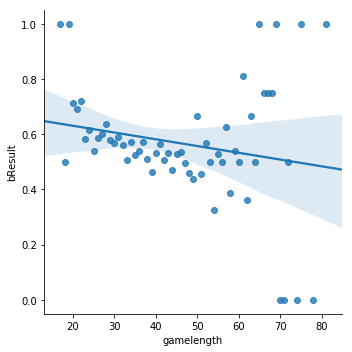

In [46]:
sns.lmplot(y = 'bResult', x = 'gamelength', data = df_grouped)
plt.show()

In [47]:
x3 = df_grouped[['bResult']]
y3 = df_grouped[['Year']]
model = linear_model.LinearRegression()
results3 = model.fit(x3, y3)
print (results3.intercept_, results3.coef_)

[ 2016.19993635] [[ 0.04191139]]


y = 0.04191139x + 2016.19993635

* In the multiple regression models are predictor variables in dependent of all the other predictor variables? Yes. The value is -0.092762 close to 0. So they are independt. 

# Part3-Logistic Model

In [48]:
df.head()

,Unnamed: 0,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,...,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address,averageDiff
0,0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,...,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...,1360.925000
1,1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,...,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...,968.657895
2,2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,...,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...,4937.075000
3,3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,...,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...,-736.365854
4,4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,...,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...,1589.000000


In [49]:
# led_model = sm.Logit(df['bResult'], df['gamelength']).fit()
# led_model.summary()

In [53]:
y, X = dmatrices('bResult ~ gamelength + Year',data=data, return_type="dataframe")
y = np.ravel(y)

In [54]:
model = LogisticRegression()
model = model.fit(X, y)
model.score(X, y)

0.54317311782220334

In [55]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

TypeError: data argument can't be an iterator